Video explicativo [https://youtu.be/IcwIdse0OMw?si=mBwv8tjtzZkqUJU6]

Diapositiva explicada [https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_9.pdf]

# Tema 2: Transformada Cuántica de Fourier

Curso IAC02.

Autor: Alejandro Mata Ali

En este notebook vamos a implementar la transformada cuántica de Fourier y veremos su efecto para diversos estados.

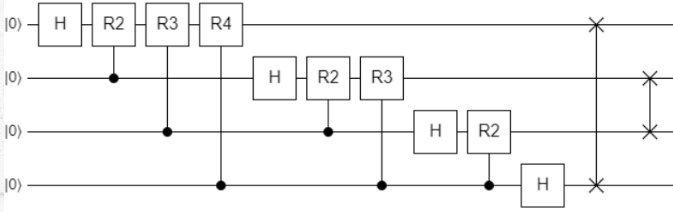

## Librerías

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
import numpy as np

---
# Circuito cuántico

Para el circuito cuántico tendremos que tener n qubits, que definirán el tamaño de la QFT. Vamos a definirlo de forma que devolvamos directamente la gate de la QFT. Es importante darse cuenta de que por la forma que tiene qiskit de representar los qubits, tenemos que darle la vuelta a todos los qubits en el algoritmo.

In [ ]:
def QFT(n:int):
    #Registros
    qr = QuantumRegister(n, 'QFTr')

    #Circuito
    qc = QuantumCircuit(qr, name='QFT')

    #Para cada qubit
    for i in range(n-1,-1,-1):
        #La primera H
        qc.h(i)
        for j in range(i-1,-1,-1):#Para los siguientes qubits
            #Puerta de fase controlada
            qc.cp(np.pi/2**(i-j), i, j)#Da igual el orden en el que se aplique

    #SWAPS finales
    for i in range(n//2):
        qc.swap(i,n-1-i)#Por parejas entre el 0 y el n-1, 1 y n-2, etc

    #Convertimos en gate
    QFT_Gate = qc.to_gate()

    return QFT_Gate

Veamos el circuito obtenido.

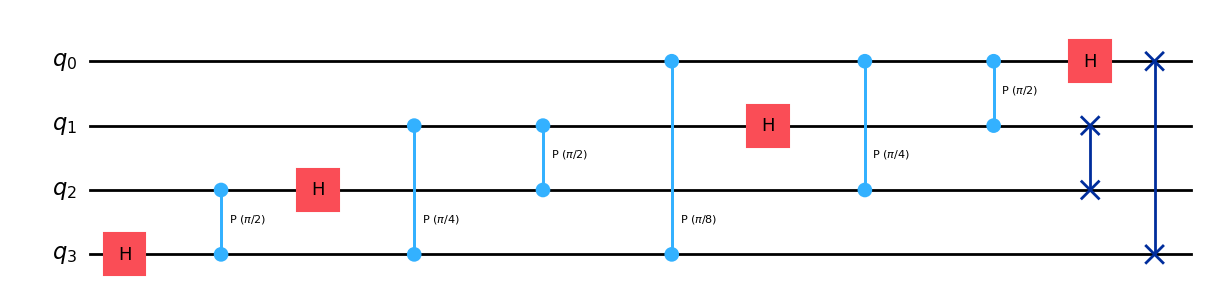

In [ ]:
n = 4
qc = QuantumCircuit(n)
#Llamamos directamente a la puerta, sin necesidad de guardarla
qc.append(QFT(n), range(n))

#Descomponemos para ver el circuito
qc2 = qc.decompose('QFT', reps=1)
qc2.draw('mpl')

Vamos a aplicarla sobre un estado concreto. Este será un estado con unas amplitudes en forma de onda exponencial compleja oscilante. Podemos cambiar su frecuencia.

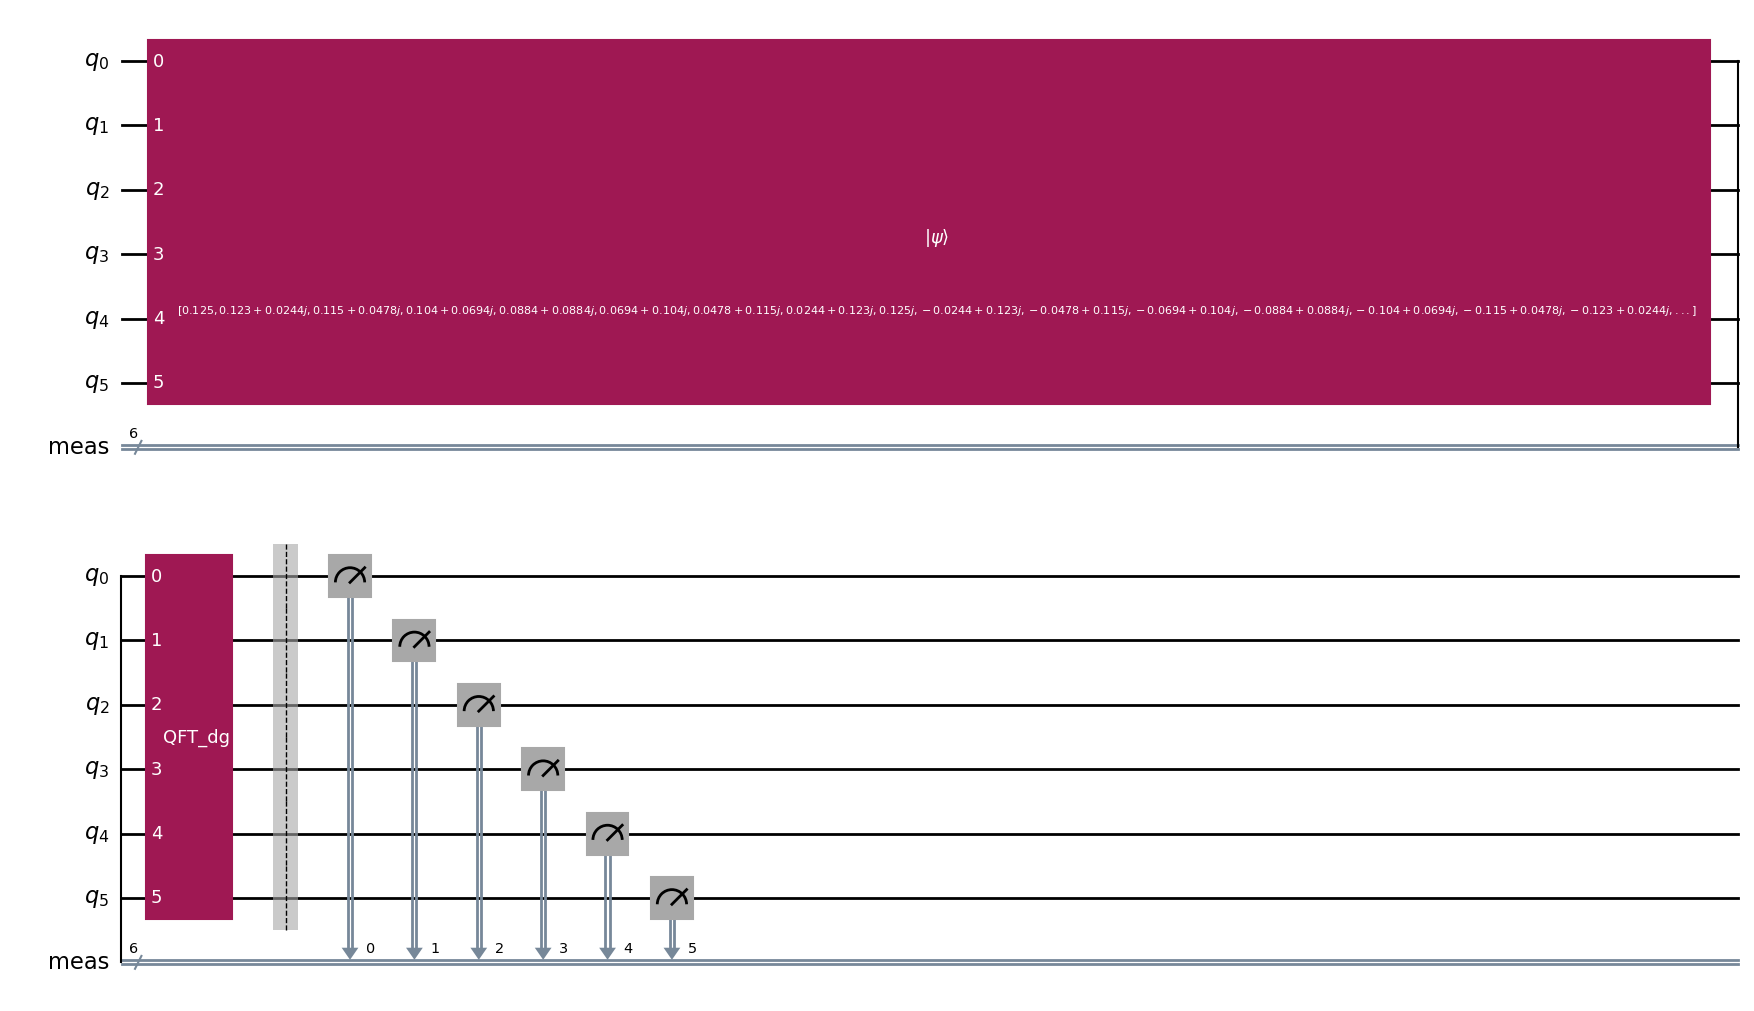

In [ ]:
n = 6
frec = 2
#Estado cosenoidal
state = np.array([np.exp(2j*np.pi*frec*_/2**n) for _ in range(2**n)])

#Circuito cuantico
qc = QuantumCircuit(n)
#Inicializamos el estado cosenoidal
qc.initialize(state, range(n), normalize=True)

#Aplicamos la QFT
qc.append(QFT(n).inverse(), range(n))

#Medimos los qubits a ver cual obtiene mayor probabilidad
qc.measure_all()

qc.draw('mpl')

---
# Ejecutando el circuito

Ejecutamos el circuito en simulador.

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


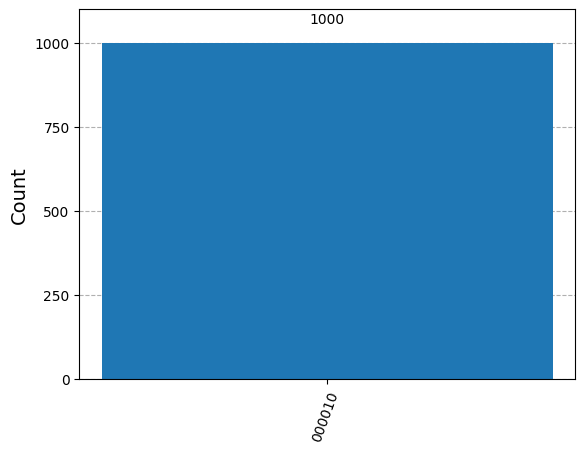

In [ ]:
#Número de shots
n_shots = 1000

#Simulador de n qubits
backend = GenericBackendV2(num_qubits=n)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

---
# Jugando con las frecuencias

Vemos que con frecuencia 2 obtenemos el resultado 2. Vamos a ir poniendo otras frecuencias.

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


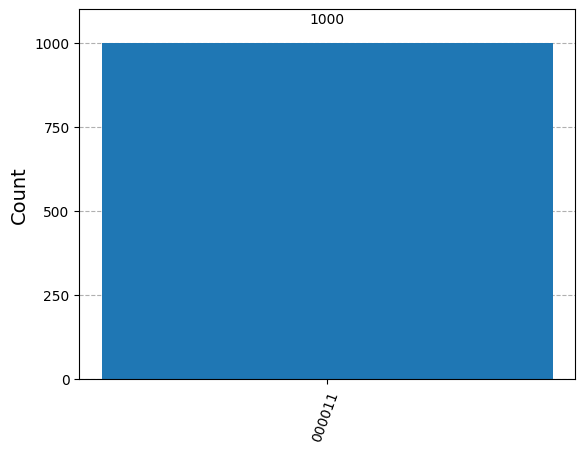

In [ ]:
n = 6
frec = 3
#Estado cosenoidal
state = np.array([np.exp(2j*np.pi*frec*_/2**n) for _ in range(2**n)])

#Circuito cuantico
qc = QuantumCircuit(n)
#Inicializamos el estado cosenoidal
qc.initialize(state, range(n), normalize=True)

#Aplicamos la QFT
qc.append(QFT(n).inverse(), range(n))

#Medimos los qubits a ver cual obtiene mayor probabilidad
qc.measure_all()

#Número de shots
n_shots = 1000

#Simulador de n qubits
backend = GenericBackendV2(num_qubits=n)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Con frecuencia 3 obtenemos el 011, que es 3.

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


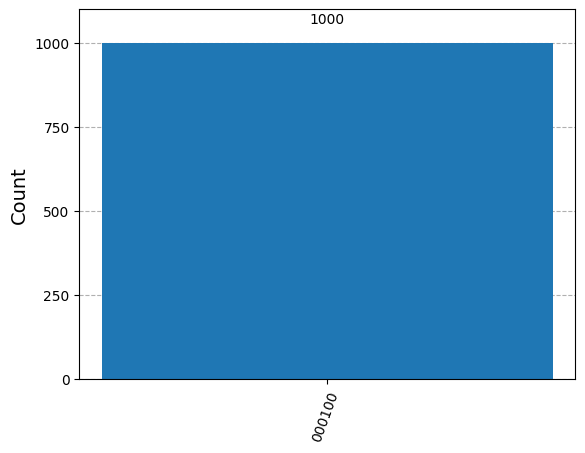

In [ ]:
n = 6
frec = 4
#Estado cosenoidal
state = np.array([np.exp(2j*np.pi*frec*_/2**n) for _ in range(2**n)])

#Circuito cuantico
qc = QuantumCircuit(n)
#Inicializamos el estado cosenoidal
qc.initialize(state, range(n), normalize=True)

#Aplicamos la QFT
qc.append(QFT(n).inverse(), range(n))

#Medimos los qubits a ver cual obtiene mayor probabilidad
qc.measure_all()

#Número de shots
n_shots = 1000

#Simulador de n qubits
backend = GenericBackendV2(num_qubits=n)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Con 4 obtenemos el 0100, que es 4.

---
#Jugando con sumas de ondas

Vemos que, efectivamente, la QFT es una función que, si le damos un estado base x, nos devolverá una superposición con esa frecuencia en la fase. Ahora bien, ¿y si le ponemos dos frecuencias diferentes sumadas?

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


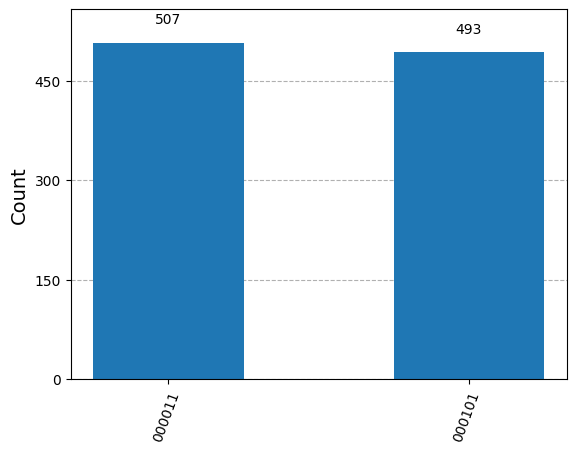

In [ ]:
n = 6
frec1 = 3
frec2 = 5
#Estado cosenoidal
state = np.array([np.exp(2j*np.pi*frec1*_/2**n)+np.exp(2j*np.pi*frec2*_/2**n) for _ in range(2**n)])

#Circuito cuantico
qc = QuantumCircuit(n)
#Inicializamos el estado cosenoidal
qc.initialize(state, range(n), normalize=True)

#Aplicamos la QFT
qc.append(QFT(n).inverse(), range(n))

#Medimos los qubits a ver cual obtiene mayor probabilidad
qc.measure_all()

#Número de shots
n_shots = 1000

#Simulador de n qubits
backend = GenericBackendV2(num_qubits=n)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Vemos que obtenemos dos picos en la frecuencia 3 y la frecuencia 5 de misma altura. Por lo tanto, si ponemos dos estados x e y, nos devolverá la suma de las dos superposiciones, como la suma de dos ondas.

Vamos a darles proporciones diferentes a ambas ondas.

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


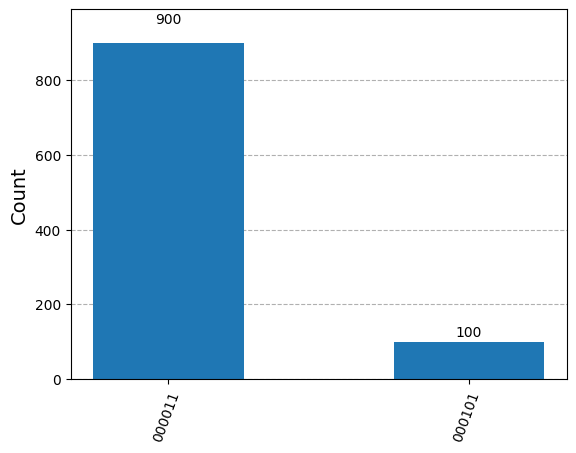

In [ ]:
n = 6
frec1 = 3
frec2 = 5
#Estado cosenoidal
state = np.array([3*np.exp(2j*np.pi*frec1*_/2**n)+np.exp(2j*np.pi*frec2*_/2**n) for _ in range(2**n)])

#Circuito cuantico
qc = QuantumCircuit(n)
#Inicializamos el estado cosenoidal
qc.initialize(state, range(n), normalize=True)

#Aplicamos la QFT
qc.append(QFT(n).inverse(), range(n))

#Medimos los qubits a ver cual obtiene mayor probabilidad
qc.measure_all()

#Número de shots
n_shots = 1000

#Simulador de n qubits
backend = GenericBackendV2(num_qubits=n)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Vemos que el pico de la frecuencia 3 es 9 veces mayor ($3^2$) que el de la frecuencia 5. Por tanto, si ponemos dos estados x e y con amplitudes diferentes, estas amplitudes serán precisamente las amplitudes de cada una de las ondas de frecuencia x e y que sumaremos.

Como vemos, la QFT nos sirve para extraer las frecuencias (o espectro) que componen una onda, lo cual tiene una cantidad absurda de aplicaciones. Algunas son el análisis espectral, compresión de información, óptica, ecuaciones diferenciales, convolución, etc.

Ahora bien, ¿qué pasa si la frecuencia no es un número entero?

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


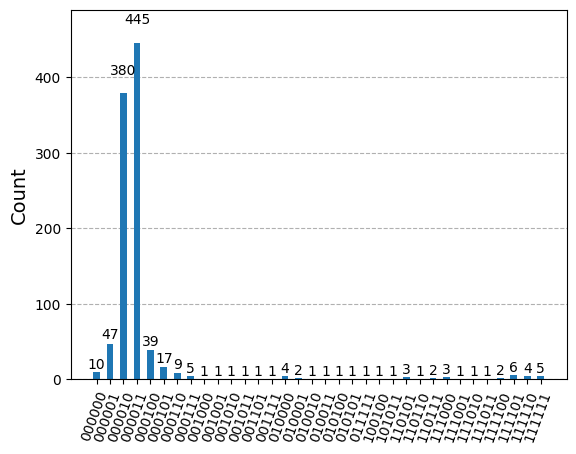

In [ ]:
n = 6
frec = 2.5
#Estado cosenoidal
state = np.array([np.exp(2j*np.pi*frec*_/2**n)for _ in range(2**n)])

#Circuito cuantico
qc = QuantumCircuit(n)
#Inicializamos el estado cosenoidal
qc.initialize(state, range(n), normalize=True)

#Aplicamos la QFT
qc.append(QFT(n).inverse(), range(n))

#Medimos los qubits a ver cual obtiene mayor probabilidad
qc.measure_all()

#Número de shots
n_shots = 1000

#Simulador de n qubits
backend = GenericBackendV2(num_qubits=n)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Vemos que hay una distribución, con un pico que comprende 2 y 3. Esto es lo esperado, ya que la frecuencia real está entre 2 y 3.

---
# Ejercicio

Haz la misma prueba con la suma de dos frecuencias no enteras de diferente altura.

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


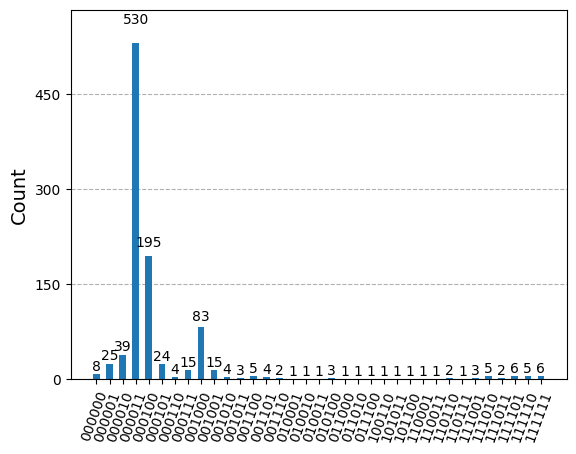

In [ ]:
n = 6
frec1 = 3.4
frec2 = 7.6
#Estado cosenoidal
state = np.array([3*np.exp(2j*np.pi*frec1*_/2**n)+np.exp(2j*np.pi*frec2*_/2**n) for _ in range(2**n)])

#Circuito cuantico
qc = QuantumCircuit(n)
#Inicializamos el estado cosenoidal
qc.initialize(state, range(n), normalize=True)

#Aplicamos la QFT
qc.append(QFT(n).inverse(), range(n))

#Medimos los qubits a ver cual obtiene mayor probabilidad
qc.measure_all()

#Número de shots
n_shots = 1000

#Simulador de n qubits
backend = GenericBackendV2(num_qubits=n)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

---
# Ejercicio

Descompon con la QFT inversa el espectro de una serie de datos.

---
# Función de Qiskit

En Qiskit ya existe una función que realiza esta puerta. Esta es QFT. Esta función permite indicarle:

1. Número de qubits: num_qubits
2. Nivel de aproximación de la misma: approximation_degree=0
3. Si queremos los SWAPS finales: do_swaps=True
4. Si queremos la inversa: inverse=False
5. Si queremos las barreras: insert_barriers=False
6. Un nombre: name=None

In [ ]:
from qiskit.circuit.library import QFT

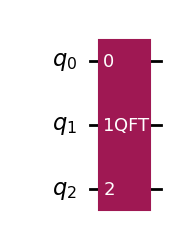

In [ ]:
qc = QuantumCircuit(3)
qc.append(QFT(3),range(3))
qc.draw('mpl')